[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving fer2013.tar to fer2013 (1).tar


KeyboardInterrupt: ignored

In [2]:
!ls

baddata.txt  datalab  fer2013  fer2013 (1).tar	fer2013.tar


In [0]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [3]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 64
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

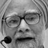

In [12]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
#model.add(Dropout(.3))
'''
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=1024, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
'''
#model.add(Flatten())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())


model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(7))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        153       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 48, 48, 64)        5760      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [18]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    shear_range=0.2,
    zoom_range=0.2)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=50,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
447/446 [==============================] - 60s 134ms/step - loss: 0.6746 - acc: 0.7477 - val_loss: 1.0577 - val_acc: 0.6494

Epoch 00001: val_acc did not improve from 0.66611
Epoch 2/50
214/446 [=============>................] - ETA: 29s - loss: 0.6682 - acc: 0.7515

447/446 [==============================] - 60s 134ms/step - loss: 0.6784 - acc: 0.7477 - val_loss: 1.0866 - val_acc: 0.6527

Epoch 00002: val_acc did not improve from 0.66611
Epoch 3/50
305/446 [===================>..........] - ETA: 18s - loss: 0.6634 - acc: 0.7535

447/446 [==============================] - 60s 134ms/step - loss: 0.6696 - acc: 0.7515 - val_loss: 1.0612 - val_acc: 0.6469

Epoch 00003: val_acc did not improve from 0.66611
Epoch 4/50
333/446 [=====================>........] - ETA: 14s - loss: 0.6727 - acc: 0.7491

447/446 [==============================] - 60s 134ms/step - loss: 0.6718 - acc: 0.7493 - val_loss: 1.0725 - val_acc: 0.6692

Epoch 00004: val_acc improved from 0.66611 to 0.66918, saving model to Model.best.hdf5
Epoch 5/50
299/446 [===================>..........] - ETA: 19s - loss: 0.6650 - acc: 0.7535

447/446 [==============================] - 60s 134ms/step - loss: 0.6701 - acc: 0.7534 - val_loss: 1.0807 - val_acc: 0.6625

Epoch 00005: val_acc did not improve from 0.66918
Epoch 6/50
331/446 [=====================>........] - ETA: 14s - loss: 0.6587 - acc: 0.7558

447/446 [==============================] - 60s 133ms/step - loss: 0.6606 - acc: 0.7538 - val_loss: 1.1146 - val_acc: 0.6505

Epoch 00006: val_acc did not improve from 0.66918
Epoch 7/50
340/446 [=====================>........] - ETA: 13s - loss: 0.6606 - acc: 0.7552

447/446 [==============================] - 60s 134ms/step - loss: 0.6635 - acc: 0.7550 - val_loss: 1.0724 - val_acc: 0.6661

Epoch 00007: val_acc did not improve from 0.66918
Epoch 8/50
343/446 [======================>.......] - ETA: 13s - loss: 0.6611 - acc: 0.7551

447/446 [==============================] - 60s 134ms/step - loss: 0.6661 - acc: 0.7529 - val_loss: 1.0590 - val_acc: 0.6697

Epoch 00008: val_acc improved from 0.66918 to 0.66974, saving model to Model.best.hdf5
Epoch 9/50
301/446 [===================>..........] - ETA: 18s - loss: 0.6583 - acc: 0.7553

447/446 [==============================] - 60s 134ms/step - loss: 0.6597 - acc: 0.7561 - val_loss: 1.1215 - val_acc: 0.6485

Epoch 00009: val_acc did not improve from 0.66974
Epoch 10/50
330/446 [=====================>........] - ETA: 15s - loss: 0.6470 - acc: 0.7584

447/446 [==============================] - 60s 134ms/step - loss: 0.6505 - acc: 0.7572 - val_loss: 1.0738 - val_acc: 0.6678

Epoch 00010: val_acc did not improve from 0.66974
Epoch 11/50
339/446 [=====================>........] - ETA: 13s - loss: 0.6425 - acc: 0.7609

447/446 [==============================] - 60s 134ms/step - loss: 0.6509 - acc: 0.7587 - val_loss: 1.1332 - val_acc: 0.6555

Epoch 00011: val_acc did not improve from 0.66974
Epoch 12/50
341/446 [=====================>........] - ETA: 13s - loss: 0.6412 - acc: 0.7630

447/446 [==============================] - 60s 133ms/step - loss: 0.6447 - acc: 0.7626 - val_loss: 1.0826 - val_acc: 0.6572

Epoch 00012: val_acc did not improve from 0.66974
Epoch 13/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6448 - acc: 0.7642

447/446 [==============================] - 60s 134ms/step - loss: 0.6474 - acc: 0.7609 - val_loss: 1.1077 - val_acc: 0.6630

Epoch 00013: val_acc did not improve from 0.66974
Epoch 14/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6396 - acc: 0.7598

447/446 [==============================] - 60s 134ms/step - loss: 0.6444 - acc: 0.7586 - val_loss: 1.1309 - val_acc: 0.6538

Epoch 00014: val_acc did not improve from 0.66974
Epoch 15/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6439 - acc: 0.7605

447/446 [==============================] - 60s 134ms/step - loss: 0.6504 - acc: 0.7587 - val_loss: 1.1011 - val_acc: 0.6603

Epoch 00015: val_acc did not improve from 0.66974
Epoch 16/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6484 - acc: 0.7588

447/446 [==============================] - 60s 134ms/step - loss: 0.6481 - acc: 0.7586 - val_loss: 1.0947 - val_acc: 0.6633

Epoch 00016: val_acc did not improve from 0.66974
Epoch 17/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6398 - acc: 0.7636

447/446 [==============================] - 60s 133ms/step - loss: 0.6414 - acc: 0.7627 - val_loss: 1.1143 - val_acc: 0.6463

Epoch 00017: val_acc did not improve from 0.66974
Epoch 18/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6345 - acc: 0.7625

447/446 [==============================] - 60s 134ms/step - loss: 0.6374 - acc: 0.7616 - val_loss: 1.0642 - val_acc: 0.6661

Epoch 00018: val_acc did not improve from 0.66974
Epoch 19/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6342 - acc: 0.7631

447/446 [==============================] - 60s 134ms/step - loss: 0.6367 - acc: 0.7614 - val_loss: 1.1194 - val_acc: 0.6608

Epoch 00019: val_acc did not improve from 0.66974
Epoch 20/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6316 - acc: 0.7659

447/446 [==============================] - 60s 134ms/step - loss: 0.6394 - acc: 0.7617 - val_loss: 1.1354 - val_acc: 0.6499

Epoch 00020: val_acc did not improve from 0.66974
Epoch 21/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6353 - acc: 0.7647

447/446 [==============================] - 60s 134ms/step - loss: 0.6376 - acc: 0.7639 - val_loss: 1.0859 - val_acc: 0.6597

Epoch 00021: val_acc did not improve from 0.66974
Epoch 22/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6305 - acc: 0.7664

447/446 [==============================] - 60s 134ms/step - loss: 0.6353 - acc: 0.7639 - val_loss: 1.1046 - val_acc: 0.6544

Epoch 00022: val_acc did not improve from 0.66974
Epoch 23/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6272 - acc: 0.7657

447/446 [==============================] - 60s 134ms/step - loss: 0.6321 - acc: 0.7640 - val_loss: 1.0630 - val_acc: 0.6697

Epoch 00023: val_acc did not improve from 0.66974
Epoch 24/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6222 - acc: 0.7700

447/446 [==============================] - 60s 134ms/step - loss: 0.6249 - acc: 0.7696 - val_loss: 1.0964 - val_acc: 0.6572

Epoch 00024: val_acc did not improve from 0.66974
Epoch 25/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6214 - acc: 0.7690

447/446 [==============================] - 60s 134ms/step - loss: 0.6271 - acc: 0.7664 - val_loss: 1.1688 - val_acc: 0.6497

Epoch 00025: val_acc did not improve from 0.66974
Epoch 26/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6229 - acc: 0.7678

447/446 [==============================] - 60s 134ms/step - loss: 0.6257 - acc: 0.7670 - val_loss: 1.1117 - val_acc: 0.6544

Epoch 00026: val_acc did not improve from 0.66974
Epoch 27/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6164 - acc: 0.7685

447/446 [==============================] - 60s 134ms/step - loss: 0.6172 - acc: 0.7698 - val_loss: 1.1303 - val_acc: 0.6463

Epoch 00027: val_acc did not improve from 0.66974
Epoch 28/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6151 - acc: 0.7746

447/446 [==============================] - 60s 134ms/step - loss: 0.6192 - acc: 0.7723 - val_loss: 1.1462 - val_acc: 0.6605

Epoch 00028: val_acc did not improve from 0.66974
Epoch 29/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6207 - acc: 0.7705

447/446 [==============================] - 60s 134ms/step - loss: 0.6228 - acc: 0.7706 - val_loss: 1.1513 - val_acc: 0.6547

Epoch 00029: val_acc did not improve from 0.66974
Epoch 30/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6218 - acc: 0.7682

447/446 [==============================] - 60s 134ms/step - loss: 0.6210 - acc: 0.7685 - val_loss: 1.1426 - val_acc: 0.6577

Epoch 00030: val_acc did not improve from 0.66974
Epoch 31/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6100 - acc: 0.7715

447/446 [==============================] - 60s 134ms/step - loss: 0.6162 - acc: 0.7705 - val_loss: 1.1107 - val_acc: 0.6575

Epoch 00031: val_acc did not improve from 0.66974
Epoch 32/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6059 - acc: 0.7735

447/446 [==============================] - 60s 134ms/step - loss: 0.6133 - acc: 0.7707 - val_loss: 1.1065 - val_acc: 0.6616

Epoch 00032: val_acc did not improve from 0.66974
Epoch 33/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6147 - acc: 0.7674

447/446 [==============================] - 60s 134ms/step - loss: 0.6147 - acc: 0.7680 - val_loss: 1.0947 - val_acc: 0.6672

Epoch 00033: val_acc did not improve from 0.66974
Epoch 34/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6070 - acc: 0.7745

447/446 [==============================] - 60s 134ms/step - loss: 0.6068 - acc: 0.7751 - val_loss: 1.1334 - val_acc: 0.6550

Epoch 00034: val_acc did not improve from 0.66974
Epoch 35/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5981 - acc: 0.7771

447/446 [==============================] - 60s 134ms/step - loss: 0.6076 - acc: 0.7722 - val_loss: 1.2020 - val_acc: 0.6463

Epoch 00035: val_acc did not improve from 0.66974
Epoch 36/50
342/446 [=====================>........] - ETA: 13s - loss: 0.6063 - acc: 0.7764

447/446 [==============================] - 60s 134ms/step - loss: 0.6100 - acc: 0.7744 - val_loss: 1.1560 - val_acc: 0.6441

Epoch 00036: val_acc did not improve from 0.66974
Epoch 37/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5998 - acc: 0.7752

447/446 [==============================] - 60s 134ms/step - loss: 0.6038 - acc: 0.7749 - val_loss: 1.1957 - val_acc: 0.6488

Epoch 00037: val_acc did not improve from 0.66974
Epoch 38/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5972 - acc: 0.7801

447/446 [==============================] - 60s 134ms/step - loss: 0.6025 - acc: 0.7777 - val_loss: 1.1494 - val_acc: 0.6625

Epoch 00038: val_acc did not improve from 0.66974
Epoch 39/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5901 - acc: 0.7816

447/446 [==============================] - 60s 134ms/step - loss: 0.6016 - acc: 0.7775 - val_loss: 1.1535 - val_acc: 0.6600

Epoch 00039: val_acc did not improve from 0.66974
Epoch 40/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5972 - acc: 0.7811

447/446 [==============================] - 60s 134ms/step - loss: 0.5990 - acc: 0.7809 - val_loss: 1.1548 - val_acc: 0.6583

Epoch 00040: val_acc did not improve from 0.66974
Epoch 41/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5938 - acc: 0.7768

447/446 [==============================] - 60s 134ms/step - loss: 0.5970 - acc: 0.7767 - val_loss: 1.1509 - val_acc: 0.6628

Epoch 00041: val_acc did not improve from 0.66974
Epoch 42/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5836 - acc: 0.7847

447/446 [==============================] - 60s 134ms/step - loss: 0.5899 - acc: 0.7817 - val_loss: 1.1828 - val_acc: 0.6555

Epoch 00042: val_acc did not improve from 0.66974
Epoch 43/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5872 - acc: 0.7830

447/446 [==============================] - 60s 134ms/step - loss: 0.5927 - acc: 0.7807 - val_loss: 1.1482 - val_acc: 0.6566

Epoch 00043: val_acc did not improve from 0.66974
Epoch 44/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5867 - acc: 0.7821

447/446 [==============================] - 60s 134ms/step - loss: 0.5896 - acc: 0.7803 - val_loss: 1.1830 - val_acc: 0.6558

Epoch 00044: val_acc did not improve from 0.66974
Epoch 45/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5924 - acc: 0.7783

447/446 [==============================] - 60s 134ms/step - loss: 0.5921 - acc: 0.7787 - val_loss: 1.2025 - val_acc: 0.6508

Epoch 00045: val_acc did not improve from 0.66974
Epoch 46/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5799 - acc: 0.7849

447/446 [==============================] - 60s 134ms/step - loss: 0.5871 - acc: 0.7822 - val_loss: 1.1510 - val_acc: 0.6572

Epoch 00046: val_acc did not improve from 0.66974
Epoch 47/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5864 - acc: 0.7805

447/446 [==============================] - 60s 134ms/step - loss: 0.5883 - acc: 0.7786 - val_loss: 1.2302 - val_acc: 0.6483

Epoch 00047: val_acc did not improve from 0.66974
Epoch 48/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5778 - acc: 0.7840

447/446 [==============================] - 60s 134ms/step - loss: 0.5782 - acc: 0.7841 - val_loss: 1.1814 - val_acc: 0.6499

Epoch 00048: val_acc did not improve from 0.66974
Epoch 49/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5779 - acc: 0.7862

447/446 [==============================] - 60s 134ms/step - loss: 0.5770 - acc: 0.7854 - val_loss: 1.1530 - val_acc: 0.6611

Epoch 00049: val_acc did not improve from 0.66974
Epoch 50/50
342/446 [=====================>........] - ETA: 13s - loss: 0.5750 - acc: 0.7876

447/446 [==============================] - 60s 134ms/step - loss: 0.5769 - acc: 0.7864 - val_loss: 1.2001 - val_acc: 0.6505

Epoch 00050: val_acc did not improve from 0.66974
--- 2991.623815536499 seconds ---


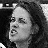

In [0]:
def predict_emotion(model, pic):
  pic = pic.convert('L')
  pic = pic.resize((48,48))
  
  from IPython.display import display
  display(pic)
  pic_np=np.asarray(pic)#.getdata()).reshape(48, 48, 1)
  pic_np = pic_np.reshape(1, 48, 48, 1)
  print(pic_np.shape)
  pic_np = pic_np / 255.0
  pic_np = pic_np - 0.5
  pic_np = pic_np * 2
  
  print(pic_np.shape)
  y = model.predict(pic_np)
  print("0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral")
  print(y)

In [0]:
from google.colab import files
uploaded = files.upload()

(48, 48, 1)


In [0]:
celebanger = Image.open("celeb_fer1.jpg")
predict_emotion(model, celebanger)

(48, 48, 1)


ValueError: ignored